In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
# Read data from cement concrete.csv and look the headers
concrete = pd.read_csv('./data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
# Information of concrete DataFrame
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
# Define the input shape
input_shape = [8,]

In [12]:
# Build a Sequential Model using keras
model = keras.Sequential([
# the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=[8]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
    ])

In [13]:
# Compile model
model.compile(optimizer='adam', loss='mae',)

In [14]:
# Alternatives to ReLU
# others are 'elu', 'selu', and 'swish'
activation_layer = layers.Activation('relu')

In [15]:
x = tf.linspace(-2.5, 3.0, 300)
y = activation_layer(x) # once created, a layer is callable just like a function

In [16]:
# Create training and validation splits
df_train = concrete.sample(frac=0.7, random_state=0)
df_valid = concrete.drop(df_train.index)

In [17]:
# Split features and target
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

Text(0, 0.5, 'Output')

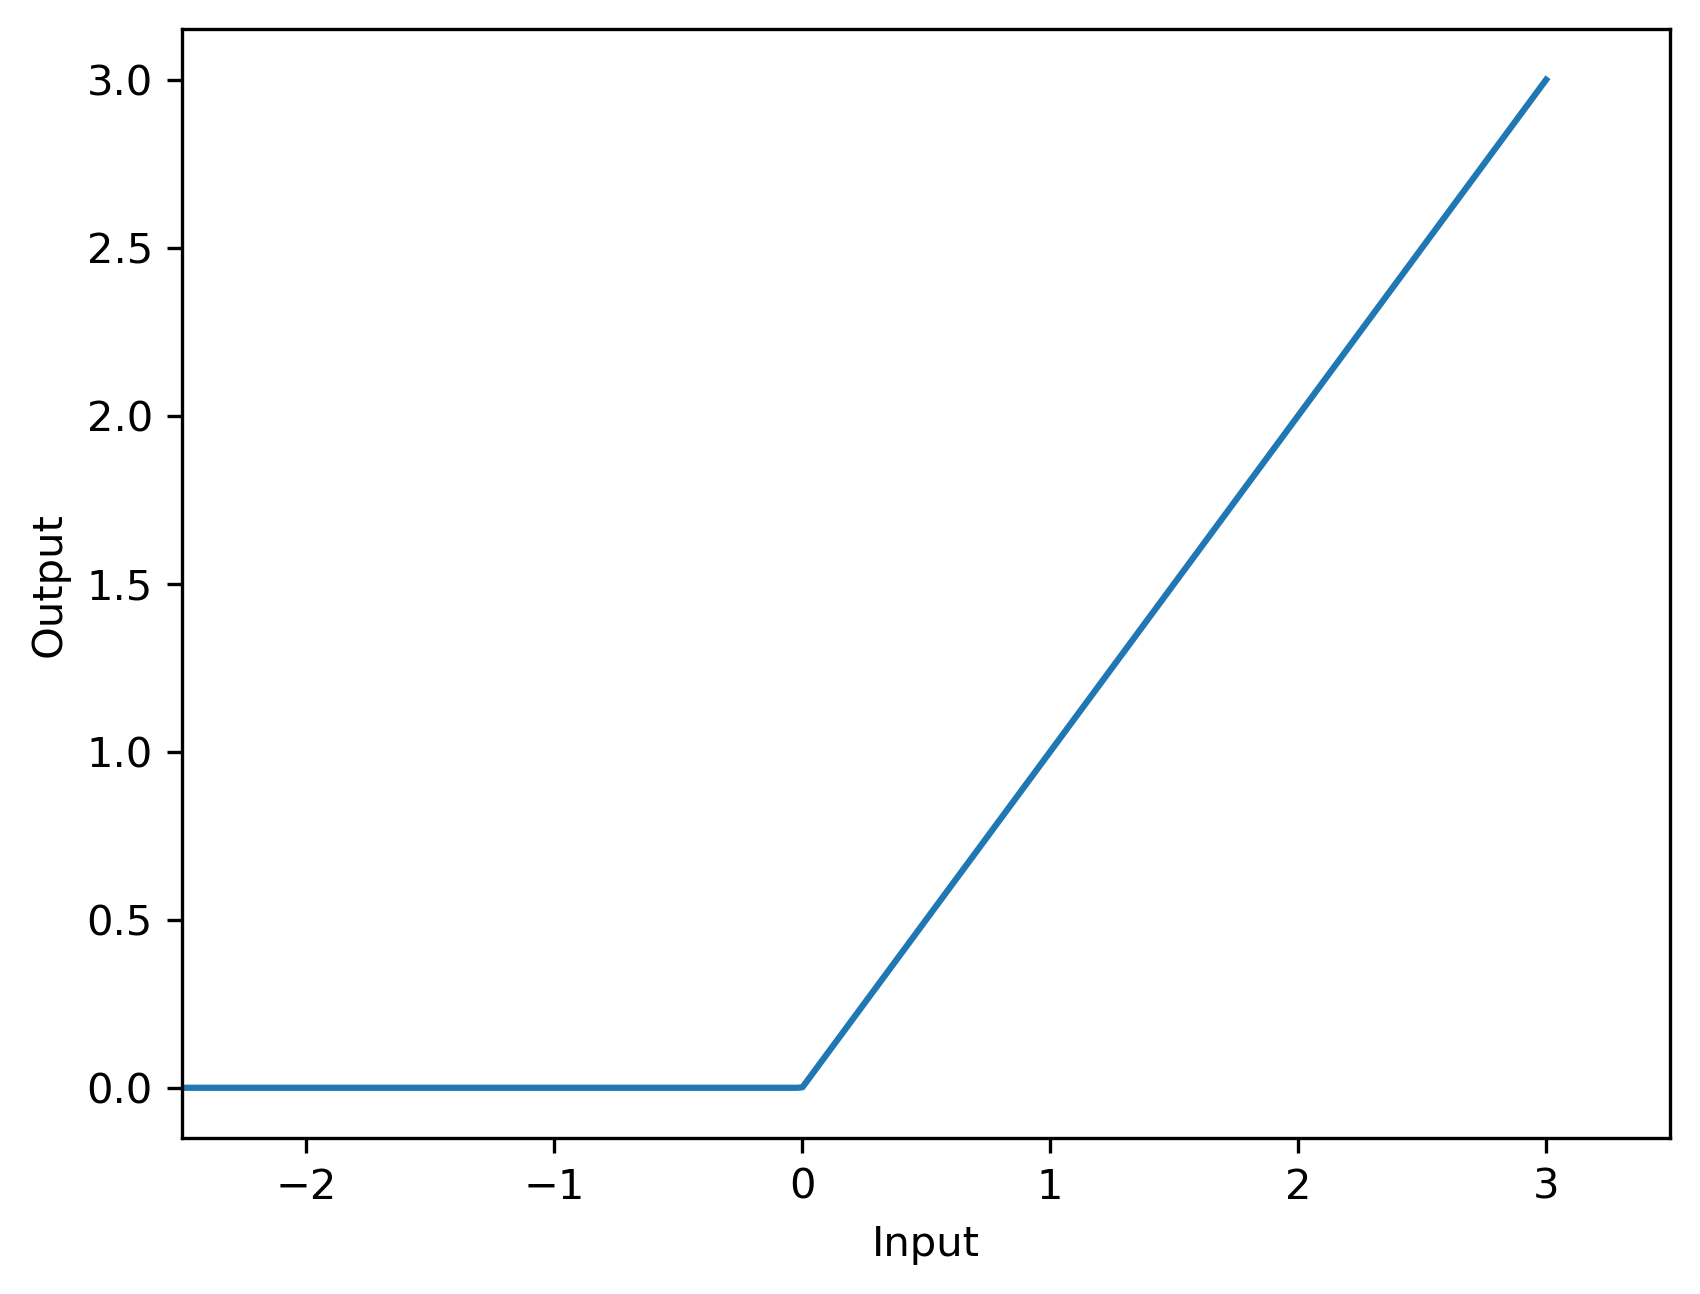

In [18]:
plt.figure(dpi=300)
plt.plot(x, y)
plt.xlim(-2.5, 3.5)
plt.xlabel("Input")
plt.ylabel("Output")
#plt.savefig('concrete.png')

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=1000,
    verbose=1,
)

Epoch 1/1000
12/12 [==============================] - 1s 46ms/step - loss: 77.1810 - val_loss: 17.9530
Epoch 2/1000
12/12 [==============================] - 0s 26ms/step - loss: 18.3745 - val_loss: 16.7089
Epoch 3/1000
12/12 [==============================] - 0s 26ms/step - loss: 12.3149 - val_loss: 10.7367
Epoch 4/1000
12/12 [==============================] - 0s 26ms/step - loss: 10.4434 - val_loss: 9.6690
Epoch 5/1000
12/12 [==============================] - 0s 26ms/step - loss: 9.0218 - val_loss: 8.0652
Epoch 6/1000
12/12 [==============================] - 0s 26ms/step - loss: 8.3298 - val_loss: 9.3825
Epoch 7/1000
12/12 [==============================] - 0s 25ms/step - loss: 7.9505 - val_loss: 6.8955
Epoch 8/1000
12/12 [==============================] - 0s 21ms/step - loss: 7.2730 - val_loss: 8.6952
Epoch 9/1000
12/12 [==============================] - 0s 22ms/step - loss: 7.4352 - val_loss: 6.7854
Epoch 10/1000
12/12 [==============================] - 0s 21ms/step - loss: 7.2321 -

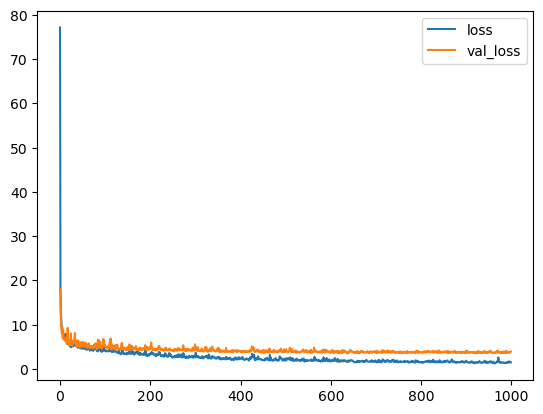

In [20]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();